In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls nyiso_load/

20170101palIntegrated_csv 20170301palIntegrated_csv 20170501palIntegrated_csv
20170201palIntegrated_csv 20170401palIntegrated_csv 20170601palIntegrated_csv


In [3]:
def select_nyc(dir_path, filename):
    df_int = pd.read_csv(dir_path + filename, parse_dates = ['Time Stamp'])
    nyc_ind = df_int.Name.apply(lambda x: 'N.Y.C.' in x)
    df_nyc = df_int.loc[nyc_ind,['Time Stamp', 'Integrated Load']].reset_index(drop = True)
    output_filename = filename[:8] + 'nyc.csv'
    df_nyc.to_csv(dir_path + output_filename, index = False)
    return df_nyc

In [4]:
df_t = pd.DataFrame()
for dir_path in os.listdir('nyiso_load/'):
    if 'csv' in dir_path:
        dir_path = 'nyiso_load/' + dir_path + '/'
        for filename in os.listdir(dir_path):
            if 'Integrated' in filename:
                df_t = pd.concat([df_t, select_nyc(dir_path, filename)])
                #select_nyc(dir_path, filename)

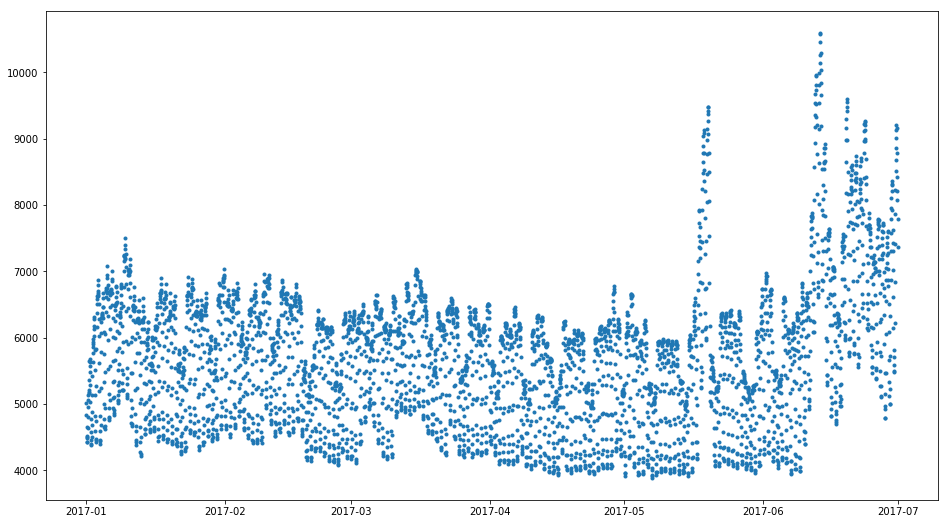

In [5]:
fig, ax = plt.subplots(figsize = (16, 9))
ax.plot(df_t.loc[:,'Time Stamp'], df_t.loc[:,'Integrated Load'], '.')
#ax.set_xlim(pd.datetime(2017,2,1), pd.datetime(2017,2,8))

In [7]:
df_t.columns = ['time_stamp', 'Integrated Load']

In [14]:
df_t.sort_values(['time_stamp'], inplace = True)

In [15]:
df_t.to_csv('nyiso_2017.csv', index = False)

In [16]:
df_t.shape

(4343, 2)

In [17]:
df_t.dtypes

time_stamp         datetime64[ns]
Integrated Load           float64
dtype: object